In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read data files
city_data = pd.read_csv("Resources/city_data.csv")
ride_data= pd.read_csv("Resources/ride_data.csv")

# Combine the data into a single dataset
combined_data = ride_data.merge(city_data, on = "city", how = "left")
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

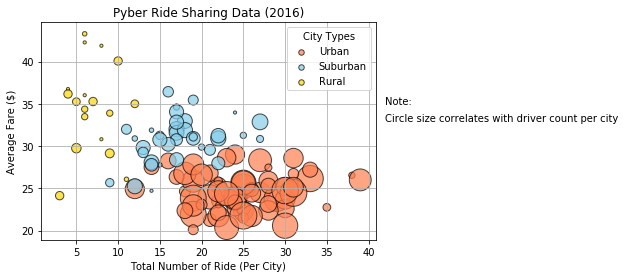

In [30]:
                # URBAN DATA
urban_data = combined_data.loc[combined_data["type"] == "Urban"]
urban_fares = urban_data.groupby("city")["fare"].mean()
urban_drivers = urban_data.groupby("city")["driver_count"].mean()
urban_rides = urban_data.groupby("city")["ride_id"].nunique()

# Build the scatter plots for Urban city type
plt.scatter(urban_rides, urban_fares, s = urban_drivers * 10, facecolors = "Coral", 
            edgecolors = "black", marker = "o", alpha = .7, label = "Urban");


                # SUBURBAN DATA
suburban_data = combined_data.loc[combined_data["type"] == "Suburban"]
suburban_fares = suburban_data.groupby("city")["fare"].mean()
suburban_drivers = suburban_data.groupby("city")["driver_count"].mean()
suburban_rides = suburban_data.groupby("city")["ride_id"].nunique()

# Build the scatter plots for Suburban city type
plt.scatter(suburban_rides, suburban_fares, s = suburban_drivers * 10, facecolors = "SkyBlue", 
            edgecolors = "black", marker = "o", alpha = .7, label = "Suburban");


                # RURAL DATA
rural_data = combined_data.loc[combined_data["type"] == "Rural"]
rural_fares = rural_data.groupby("city")["fare"].mean()
rural_drivers = rural_data.groupby("city")["driver_count"].mean()
rural_rides = rural_data.groupby("city")["ride_id"].nunique()

# Build the scatter plots for Rural city type
plt.scatter(rural_rides, rural_fares, s = rural_drivers * 10, facecolors = "Gold", 
            edgecolors = "black", marker = "o", alpha = .7, label = "Rural");



# Incorporate the other graph properties
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Ride (Per City)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()


# Create a legend
l = plt.legend(loc = "best", title = "City Types")
l.legendHandles[0]._sizes = [30]
l.legendHandles[1]._sizes = [30]
l.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: ");
plt.text(42, 33, "Circle size correlates with driver count per city");

# Save Figure
plt.savefig("Images/ride_share_scatter.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

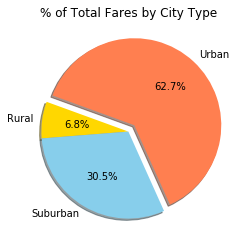

In [4]:
# Calculate Type Percents
total_fares = combined_data.groupby("type")["fare"].sum()
colors = ["Gold", "SkyBlue", "Coral"]
city_type = ["Rural", "Suburban", "Urban"]
explode = [0, 0, 0.1]

# Build Pie Chart
plt.pie(total_fares, labels = city_type, colors = colors, explode = explode, 
        shadow = True, startangle = 160, autopct = "%1.1f%%");


plt.title("% of Total Fares by City Type");

# Save Figure
plt.savefig("Images/total_fares_pie.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

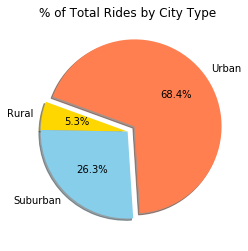

In [6]:
# Calculate Ride Percents
total_rides = combined_data.groupby("type")["ride_id"].nunique()
colors = ["Gold", "SkyBlue", "Coral"]
city_type = ["Rural", "Suburban", "Urban"]
explode = [0, 0, 0.1]

# Build Pie Chart
plt.pie(total_rides, labels = city_type, colors = colors, explode = explode, 
        shadow = True, startangle = 160, autopct = "%1.1f%%");


plt.title("% of Total Rides by City Type");

# Save Figure
plt.savefig("Images/total_rides_pie.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

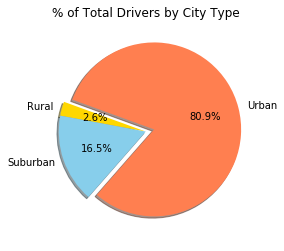

In [15]:
# Calculate Driver Percents
total_drivers = city_data.groupby("type")["driver_count"].sum()
colors = ["Gold", "SkyBlue", "Coral"]
city_type = ["Rural", "Suburban", "Urban"]
explode = [0, 0, 0.1]

# Build Pie Chart
plt.pie(total_drivers, labels = city_type, colors = colors, explode = explode, 
        shadow = True, startangle = 160, autopct = "%1.1f%%");

plt.title("% of Total Drivers by City Type");

# Save Figure
plt.savefig("Images/total_drivers_pie.png")

In [9]:
# Show Figure
plt.show()